In [1]:
import pandas as pd
import numpy as np
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import random
random.seed(2023)

In [4]:
# chunk_size = 1000  # 设置每次读取的行数
# dataframes = pd.read_csv('汇总数据.csv', chunksize=chunk_size)
# df = pd.concat(dataframes)
# df['日期'] = pd.to_datetime(df['日期'])
# df = df.sort_values(by=['井号', '日期'])
# df['日产气'].fillna(0, inplace=True)
# # 获取'甜点分区'列的不重复值  
# unique_values = df['井号'].drop_duplicates().tolist()
# selected_datas = []

# for unique_value in unique_values:
#     selected_data = df.loc[df['井号'] == unique_value].reset_index(drop=True)
#     # 重新计算历年累计产气量
#     selected_data["历年累计产气量"] = selected_data.groupby("井号")["日产气"].cumsum()
#     selected_datas.append(selected_data)
# df = pd.concat(selected_datas)
# df.to_csv('汇总数据_修订.csv', index=False)

In [3]:
chunk_size = 1000  # 设置每次读取的行数
# dataframes = pd.read_csv('汇总数据.csv', chunksize=chunk_size)
# dataframes = pd.read_csv('汇总数据_修订.csv', chunksize=chunk_size)
dataframes = pd.read_csv('data/汇总数据_修订_天数对齐.csv', chunksize=chunk_size)

df = pd.concat(dataframes)
# 提取指定列的数据  
df = df[['井号','日期','日产气','历年累计产气量','甜点分区','生产天数']]
df['日期'] = pd.to_datetime(df['日期'])
df = df.sort_values(by=['井号', '日期'])

In [35]:
# chunk_size = 1000  # 设置每次读取的行数
# # dataframes = pd.read_csv('汇总数据.csv', chunksize=chunk_size)
# # dataframes = pd.read_csv('汇总数据_修订.csv', chunksize=chunk_size)
# dataframes = pd.read_csv('data/第六年生产情况.csv', chunksize=chunk_size)

# df = pd.concat(dataframes)
# # 提取指定列的数据  
# df = df[['井号','日期','日产气','历年累计产气量','甜点分区','生产天数']]
# df['日期'] = pd.to_datetime(df['日期'])
# df = df.sort_values(by=['井号', '日期'])

# plot_data(df, size=None, plotFeature="历年累计产气量", area='ALL')
# # plot_data(df, size=10, plotFeature="日产气", area='ALL')


In [57]:
# # 获取'甜点分区'列的不重复值  
# unique_values = df['井号'].drop_duplicates().tolist()
# selected_datas = []

# for unique_value in unique_values:
#     selected_data = df.loc[df['井号'] == unique_value].reset_index(drop=True)
#     # 新增"生产天数"列，并计算值
#     selected_data["生产天数"] = selected_data.groupby("井号").cumcount() + 1
#     selected_datas.append(selected_data)
# df = pd.concat(selected_datas)
# df.to_csv('汇总数据_修订_天数对齐.csv', index=False)

In [5]:
# 获取含有空值的列名                  
# null_columns = df.columns[df.isna().any()].tolist()
# for null_column in null_columns:
#     df[null_column].fillna(0, inplace=True)

In [21]:
df.head()

,井号,日期,日产气,历年累计产气量,甜点分区,生产天数
0,威202H1-1,2015-08-10,0.3518,0.3518,柠檬,1
1,威202H1-1,2015-08-11,0.0000,0.3518,柠檬,2
2,威202H1-1,2015-08-12,0.0000,0.3518,柠檬,3
3,威202H1-1,2015-08-13,0.0000,0.3518,柠檬,4
4,威202H1-1,2015-08-14,0.1134,0.4652,柠檬,5


In [22]:
# 获取'甜点分区'列的不重复值  
unique_values = df['甜点分区'].drop_duplicates().tolist()
unique_values

['柠檬', '甜橘', '甜蔗', '甜蜜']

In [23]:
df_NM = df.loc[df['甜点分区'] == '柠檬']  #柠檬
df_TZ = df.loc[df['甜点分区'] == '甜蔗']  #甜蔗
df_TJ = df.loc[df['甜点分区'] == '甜橘']  #甜橘
df_TM = df.loc[df['甜点分区'] == '甜蜜']  #甜蜜

In [24]:
unique_values = df_TM['井号'].drop_duplicates().tolist()
print('甜蜜区个数：', len(unique_values))

unique_values = df_TJ['井号'].drop_duplicates().tolist()
print('甜橘区个数：', len(unique_values))

unique_values = df_TZ['井号'].drop_duplicates().tolist()
print('甜蔗区个数：', len(unique_values))

unique_values = df_NM['井号'].drop_duplicates().tolist()
print('柠檬区个数：', len(unique_values))

甜蜜区个数： 25
甜橘区个数： 51
甜蔗区个数： 146
柠檬区个数： 20


In [50]:
def plot_data(dfData, size=None, plotFeature="历年累计产气量", area='柠檬'):  
    font = FontProperties(fname=r"SimSun.ttf")  # 替换成你电脑上的中文字体文件路径  
    plt.rcParams['font.sans-serif'] = [font.get_name()]  # 在绘制时使用这个字体    
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号    
  
    if size is None:  
        wells = dfData["井号"].unique()  
    else:  
        wells = dfData["井号"].unique()[0:size]  
    
    # random.shuffle(wells)
    # plt.figure(figsize=(10, 6)) 
    plt.xlim()
    plt.ylim()
    for well in wells:  
        x = dfData[dfData["井号"] == well]["日期"]  
        y = dfData[dfData["井号"] == well][plotFeature]  
        plt.plot(x, y, label=well)  
  
    plt.xlabel("日期")  
    plt.ylabel(plotFeature)  
    plt.title(area)  
    # plt.legend()
    plt.savefig(area + '_' + plotFeature + '.png', dpi=600)
    plt.show()

In [14]:
def plot_data(dfData, size=None, plotFeature="历年累计产气量", area='柠檬'):  
    font = FontProperties(fname=r"SimSun.ttf")  # 替换成你电脑上的中文字体文件路径  
    plt.rcParams['font.sans-serif'] = [font.get_name()]  # 在绘制时使用这个字体    
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号    
  
    if size is None:  
        wells = dfData["井号"].unique()  
    else:  
        wells = dfData["井号"].unique()[0:size]  
    
    random.shuffle(wells)
    # plt.figure(figsize=(10, 6)) 
    plt.xlim()
    plt.ylim()
    for well in wells:  
        x = dfData[dfData["井号"] == well]["生产天数"]  
        y = dfData[dfData["井号"] == well][plotFeature]  
        plt.plot(x, y, label=well)  
  
    plt.xlabel("生产天数")  
    plt.ylabel(plotFeature)  
    plt.title(area)  
    # plt.legend()
    plt.savefig('img/' + area + '_' + plotFeature + '.png', dpi=600)
    plt.show()

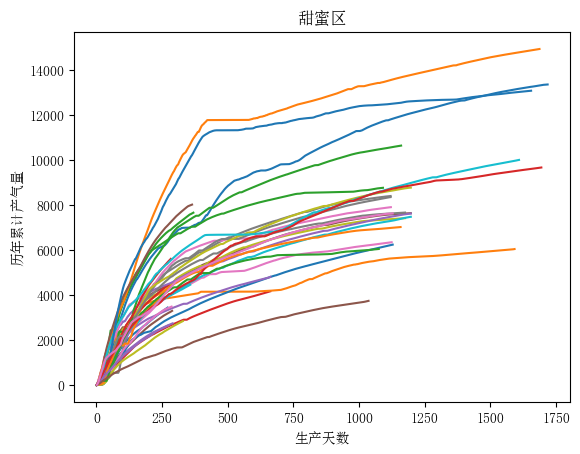

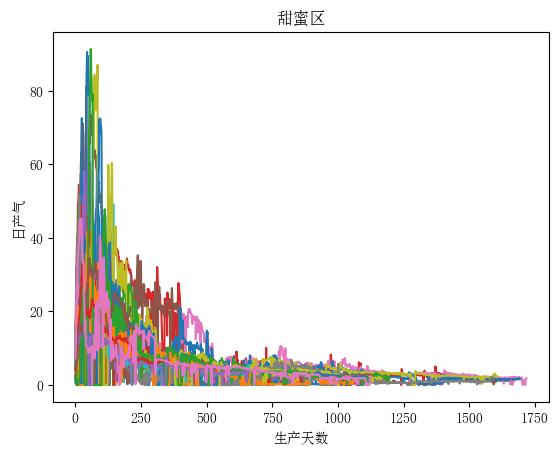

In [15]:
plot_data(df_TM, size=None, plotFeature="历年累计产气量", area='甜蜜区')
plot_data(df_TM, size=None, plotFeature="日产气", area='甜蜜区')

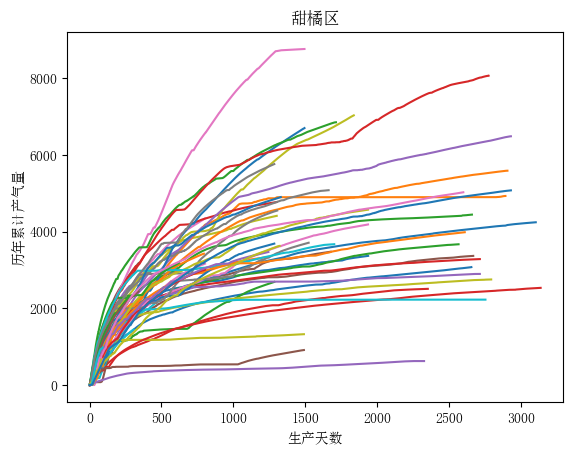

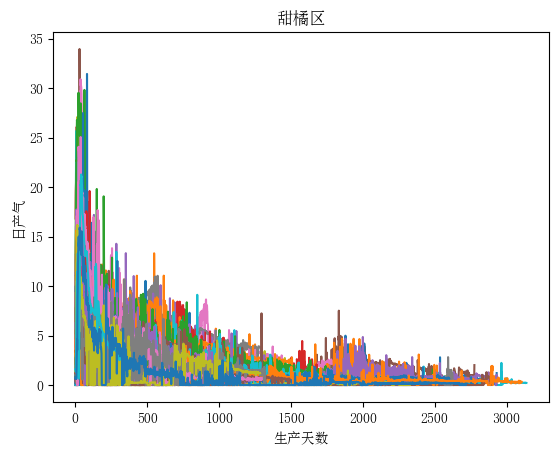

In [18]:
plot_data(df_TJ, size=None, plotFeature="历年累计产气量", area='甜橘区')
plot_data(df_TJ, size=None, plotFeature="日产气", area='甜橘区')

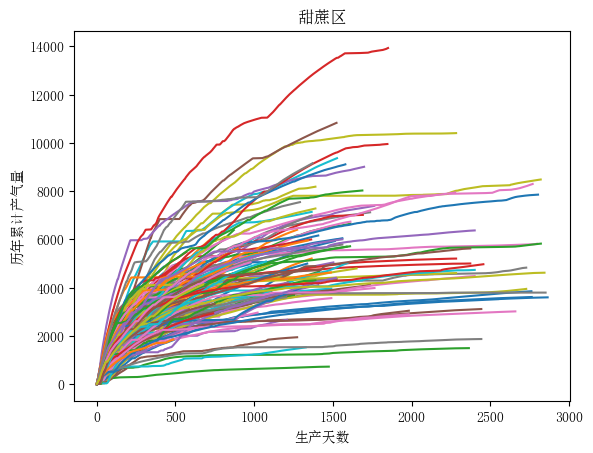

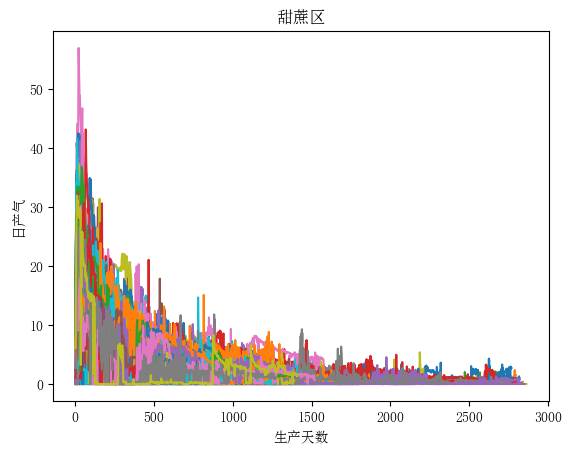

In [16]:
plot_data(df_TZ, size=None, plotFeature="历年累计产气量", area='甜蔗区')
plot_data(df_TZ, size=None, plotFeature="日产气", area='甜蔗区')

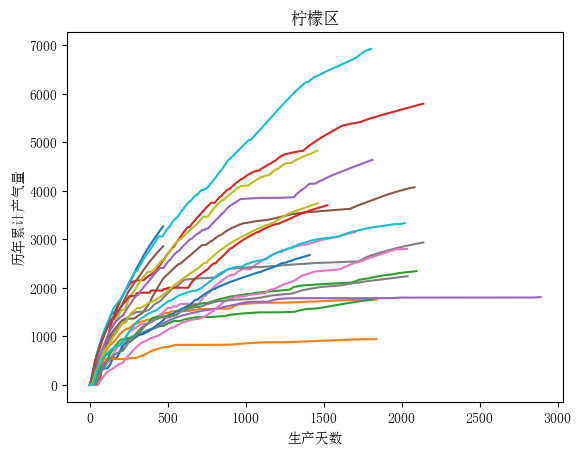

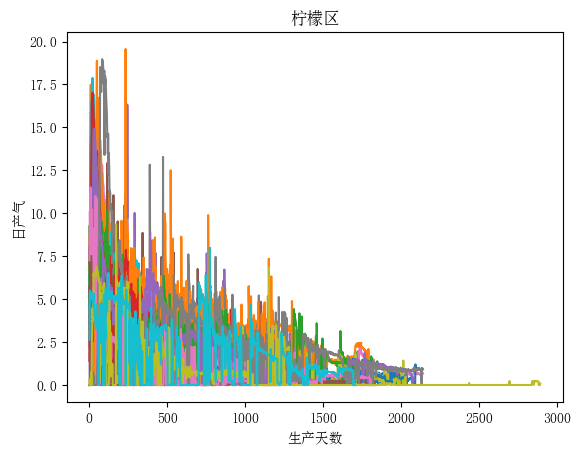

In [19]:
plot_data(df_NM, size=None, plotFeature="历年累计产气量", area='柠檬区')
plot_data(df_NM, size=None, plotFeature="日产气", area='柠檬区')